### Linear Regression

** With this data our objective is create a model using linear regression to predict the houses price **

#import libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [20]:
house = pd.read_csv("housing.csv")

In [21]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

 The data contains the following columns:

 'crim': per capita crime rate by town.
 'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
 'indus': proportion of non-retail business acres per town.
 'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
 'nox': nitrogen oxides concentration (parts per 10 million).
 'rm': average number of rooms per dwelling.
 'age': proportion of owner-occupied units built prior to 1940.
 'dis': weighted mean of distances to five Boston employment centres.
 'rad': index of accessibility to radial highways.
 'tax': full-value property-tax rate per 10,000 dollars.
 'ptratio': pupil-teacher ratio by town
 'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
 'lstat': lower status of the population (percent).
 'medv': median value of owner-occupied homes in 1000 dollars.

<Axes: xlabel='RM', ylabel='MEDV'>

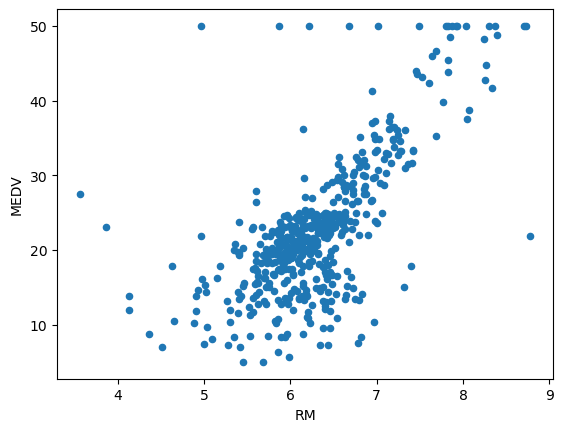

In [33]:
house.plot.scatter('RM', 'MEDV')
#In this plot its clearly to see a linear pattern. 
#Wheter more average number of rooms per dwelling, more expensive the median value is.

<Axes: >

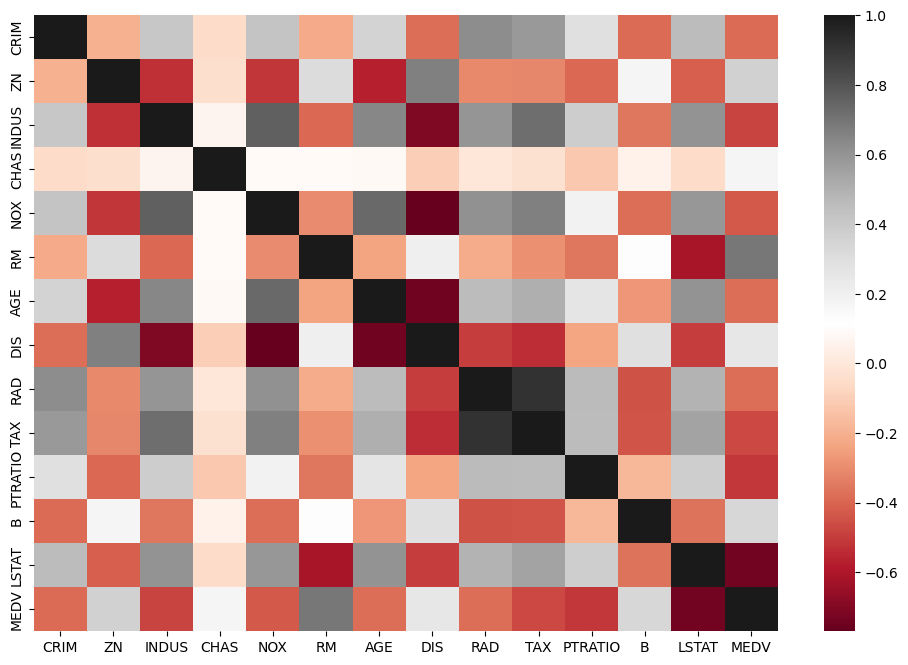

In [35]:
plt.subplots(figsize=(12,8))
sns.heatmap(house.corr(), cmap = 'RdGy')

At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus ate the last line, where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation
When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

Lets plot the paiplot, for all different correlations

Negative Correlation.

When x is high y is low and vice versa.

To the right less negative correlation.

C:\Users\Rehan Ansari\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


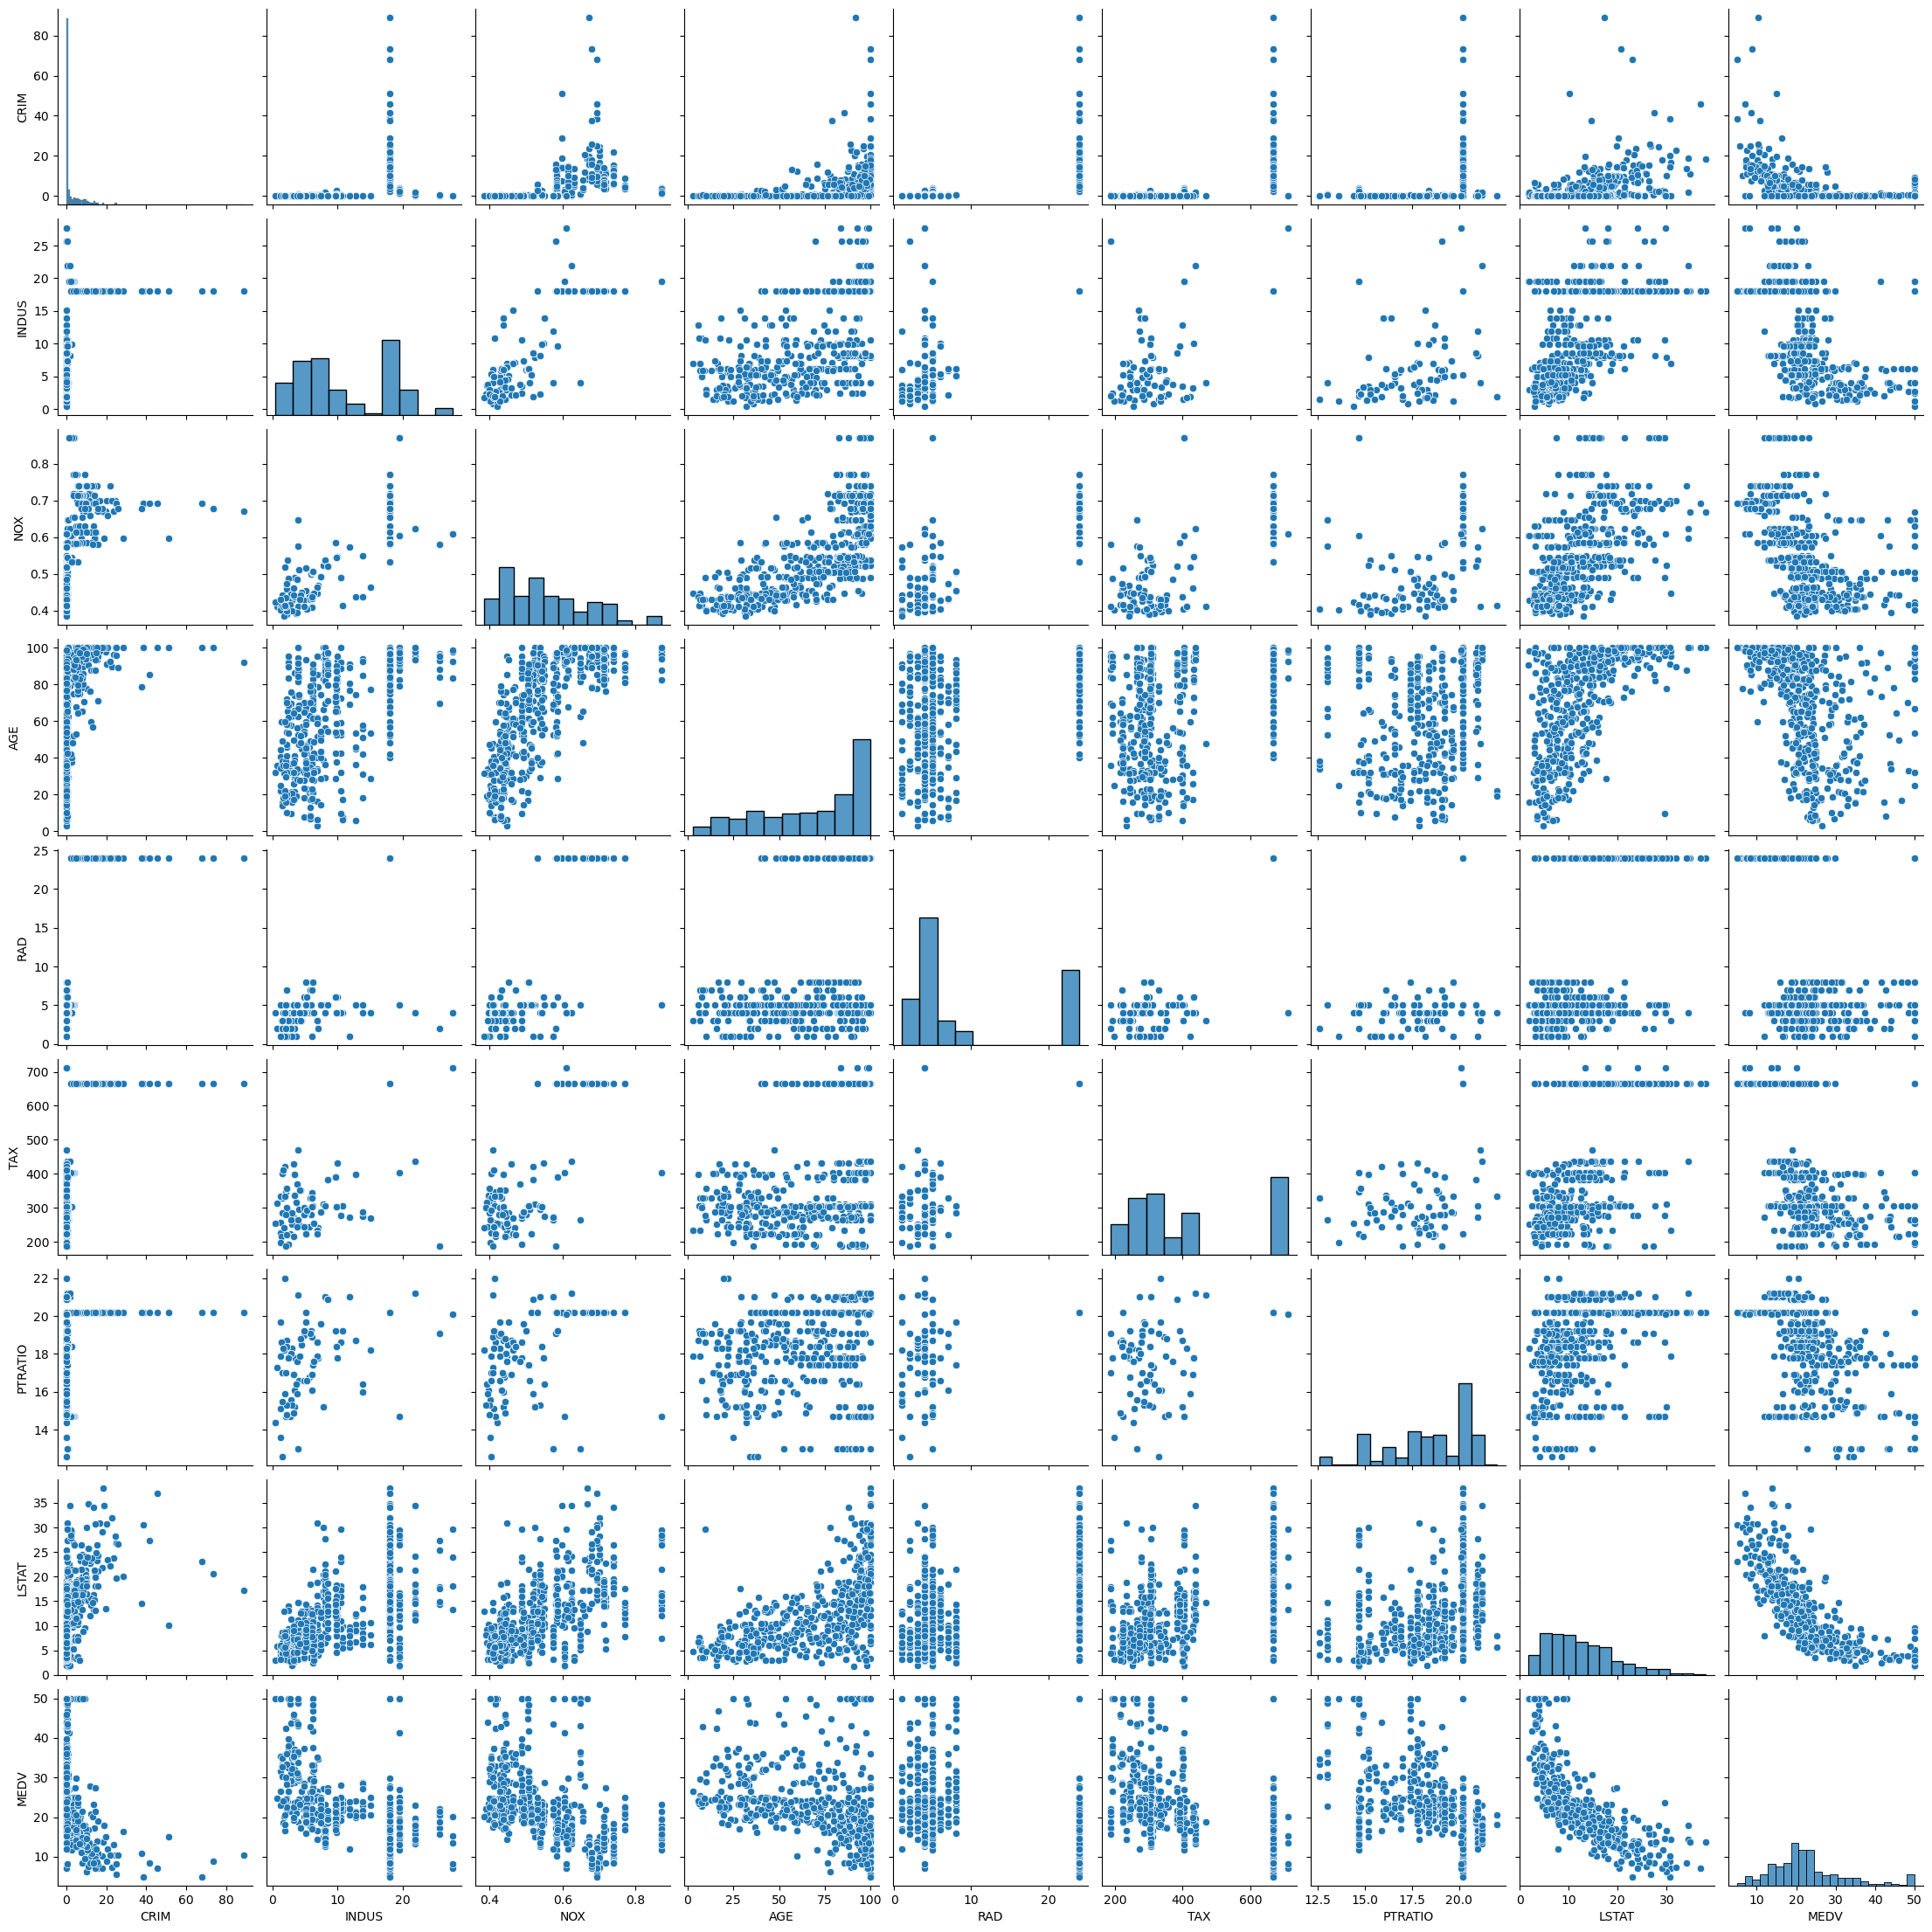

In [38]:
sns.pairplot(house,vars = ["CRIM","INDUS","NOX","AGE","RAD","TAX","PTRATIO","LSTAT","MEDV"])

Zero Correlation. When x and y are completely independent

Positive Correlation. When x and y go together

to the right more independent.

In [ ]:
# Training Linear Regression Model
**Define X and Y**

X: Varibles named as predictors, independent variables, features.                                                               
Y: Variable named as response or dependent variable
    


In [16]:
from sklearn.model_selection import train_test_split
x = house[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = house['MEDV']

In [17]:
# splitting model data with 70% for training.
# TESTING DATA SIZE IS OF 30% OF ENTIRE DATA
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30, random_state=5)

###  USING LINEAR REGRESSION MODEL

Text(0, 0.5, 'Predicted Y')

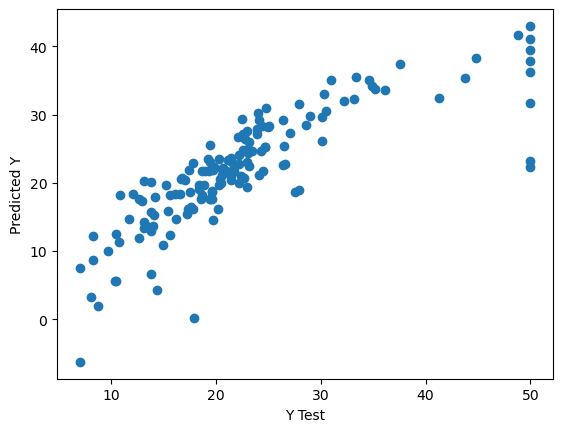

In [29]:
from sklearn.linear_model import LinearRegression
#Load our First model
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
plt.scatter(y_test,pred_lr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,pred_lr))
print(metrics.mean_squared_error(y_test,pred_lr))
print(np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))

3.5576684756500456
30.697037704088643
5.540490745781337


C:\Users\Rehan Ansari\AppData\Local\Temp\ipykernel_13596\3671217833.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred_lr),bins=50);


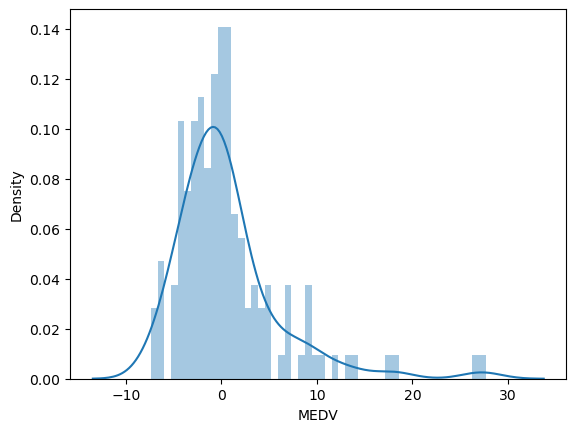

In [30]:
sns.distplot((y_test-pred_lr),bins=50);

In [40]:
coefficients = pd.DataFrame(lr.coef_,x.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.154486
ZN,0.041395
INDUS,-0.025377
CHAS,0.786055
NOX,-12.936584
RM,4.039523
AGE,-0.010535
DIS,-1.334986
RAD,0.318273
TAX,-0.012643


How to interpret those coefficients: they are in function of Medv, so

for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit.
for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.
*1000 because the medv is in 1000 and this apply to the other variables/coefficients.